<a href="https://colab.research.google.com/github/masadlara/CorrelationAnalysisMovies/blob/main/Correlation_Analysis_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Notebook Description

This notebook presents a comprehensive correlation analysis of movies in the movie industry. The goal is to identify the variables that exhibit the highest correlation with gross earnings, providing insights into the factors that contribute significantly to a movie's financial success.

The dataset contains information on movie names, companies, budgets, votes received from viewers, and the corresponding gross earnings. These variables serve as the foundation for understanding the financial performance of movies.

The analysis begins with data exploration & cleaning, followed by some plots and correlation analysis to examine the relationships between different features and gross earnings. By calculating the correlation coefficients, it identifies the strength and direction of the relationships.

Visualizations are used to present the findings of the correlation analysis, allowing for clear and concise interpretation of the results. The notebook concludes by highlighting the significance of budget and votes as key factors influencing the financial success of movies in the industry, indicated by the gross earnings.

This correlation analysis serves as a valuable resource for stakeholders in the movie industry, providing insights into the variables that have the highest correlation with gross earnings. By understanding the impact of budget and votes on a movie's financial success, industry professionals can make informed decisions regarding investment, marketing strategies, and audience engagement to maximize profitability.

## 2. Import Libraries

This section shows loading the needed libraries for this case study

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts configuration of plots that will be created

pd.options.mode.chained_assignment = None

## 3. Load the Dataset

This section shows loading the needed dataset for this case study, along with exploring how the data looks like, how many rows and columns it has and what titles the columns have within this dataset.

In [ ]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


###3.1 Load Dataset into a Dataframe

In [ ]:
#load data into dataframe
df=pd.read_csv('movies.csv')
df.head(6)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0


###3.2 Show number of columns & rows

In [ ]:
#show the number of rows & columns
df.shape

(7668, 15)

There are 7,668 rows (movies) with 15 columns (variables) in this dataset


###3.3 Show all Columns

In [ ]:
#show titles of all columns
df.columns.values

array(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross',
       'company', 'runtime'], dtype=object)

Some of the columns seem irrelevant to correaltion analysis such as name i.e. movie name does not have an effect on correlation

##4. Data Exploration & Cleaning

The Data Exploration and Cleaning section focuses on understanding the dataset and preparing it for further analysis. This section encompasses several subsections, including checking for data types, handling missing/null and N/A values, and removing unnecessary columns, to ensure the dataset is of high quality, accurate, complete, and suitable for subsequent analyses.

###4.1 Missing Data Check

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
for col in df.columns:
    num_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, round(num_missing)))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [ ]:
#display how many cell values are missing in our dataset
pd.isnull(df).sum().sum()

2473

2473 cells in different columns are missing values (empty cells).

There are different ways to deal with missing values in datasets but I choose to drop rows with these missing values in all columns although this represents a good portion of the dataset.

In order to drop the rows with missing values, I run the below code:

In [ ]:
# Specify the columns of interest
columns_of_interest = ['name', 'rating', 'genre', 'year', 'released', 'score', 'votes', 'director', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']

# Drop rows with any empty/NA/null cells in the specified columns
df.dropna(subset=columns_of_interest, inplace=True)


In [ ]:
#display how many cell values are missing in our dataset
pd.isnull(df).sum().sum()

0

In [ ]:
#show the number of rows & columns
df.shape

(5421, 15)

###4.2 Data Types of Dataset Columns

This subsection examines the data types of variables within the dataset. It identifies the types of variables present, such as numerical (integer, float) or categorical (string, boolean). Understanding the data types helps determine appropriate analysis techniques and identify any inconsistencies or data type conversions needed.

Missing, null or N/A values within the dataset are addressed. It includes techniques such as identifying the extent of missingness, imputation methods (mean, median, mode), or deletion strategies to handle missing values. Dealing with missing values ensures the dataset's completeness and prevents biases in subsequent analyses.

In [ ]:
#display data types of dataset columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#change data type of budget column
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
#display data types of dataset columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

###4.3 Sorting Data

In [ ]:
# Order our Data a little bit

df=df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


###4.4 Scatter Plot & Regression Line

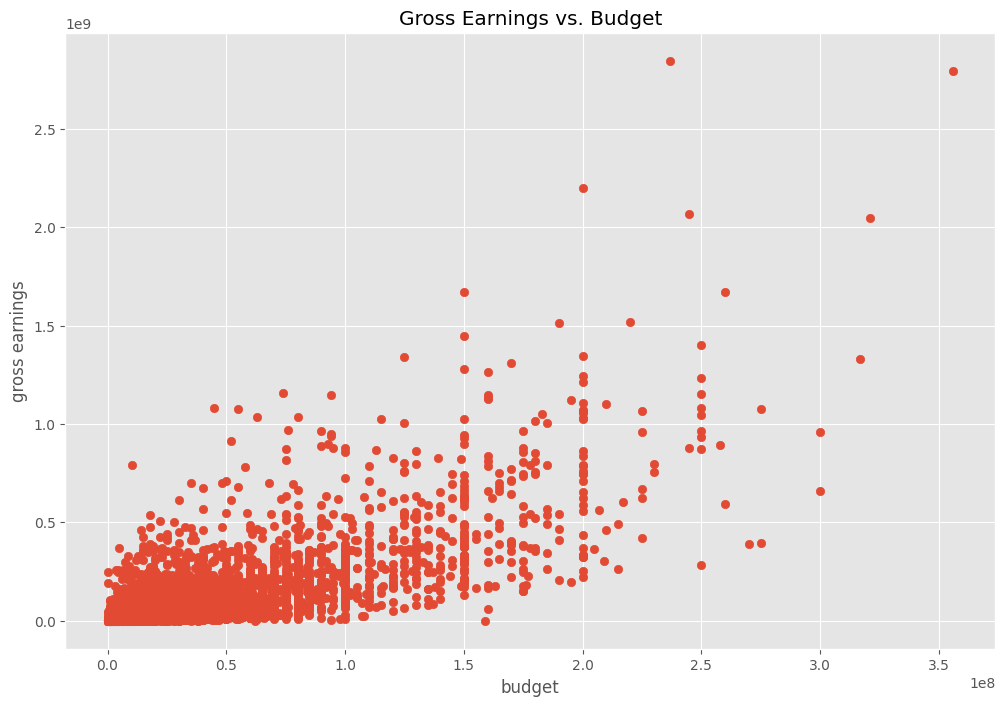

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Gross Earnings vs. Budget')

plt.xlabel ('budget')

plt.ylabel ('gross earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

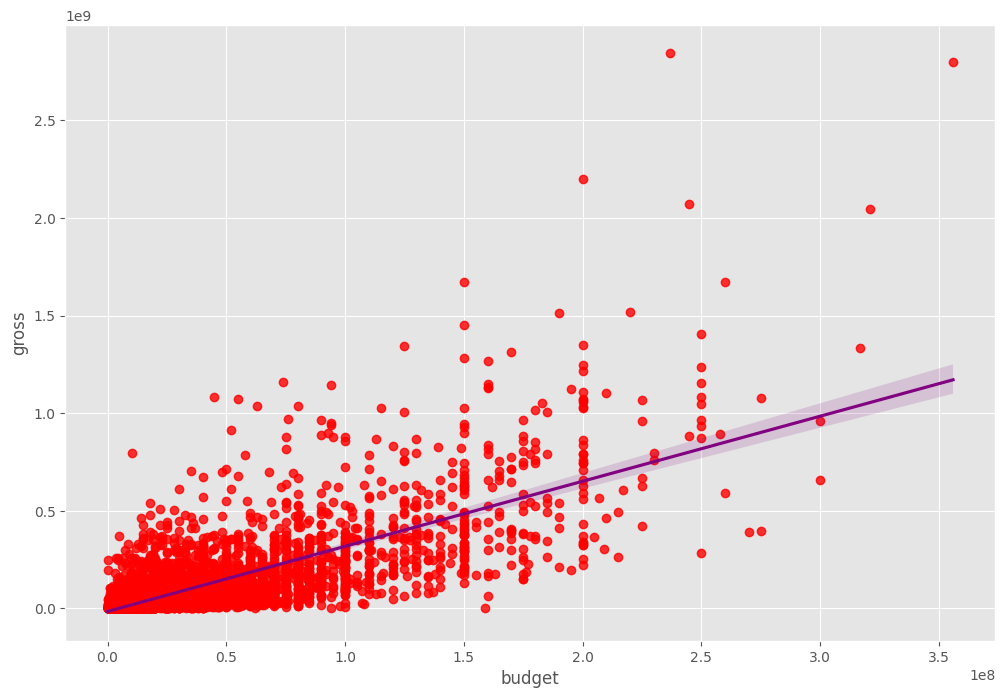

In [ ]:
#add regression line to scatter plot
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "purple"})

###4.5 Correlations

For correlation analysis between budget and gross earnings, the most commonly used coefficient is the Pearson correlation coefficient (also known as Pearson's r). Pearson's correlation coefficient measures the linear relationship between two continuous variables. It quantifies the strength and direction of the linear association between the variables on a scale from -1 to +1.

Pearson's correlation coefficient is suitable for analyzing the relationship between budget and gross earnings because it assumes that the relationship between the variables is linear. It assesses how well the data points of the two variables can be described by a straight line. The coefficient ranges from -1 to +1, where:

1. A value of +1 indicates a perfect positive linear relationship, meaning that as one variable (budget) increases, the other variable (gross earnings) also increases proportionally.
2. A value of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other variable decreases proportionally.
3. A value of 0 indicates no linear relationship between the variables.

####4.5.1 Correlations of numeric features

In [ ]:
df.corr() #the default correlation coefficient is Pearson

<ipython-input-35-02d24df6efa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #the default correlation coefficient is Pearson


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<ipython-input-40-13304779f61c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


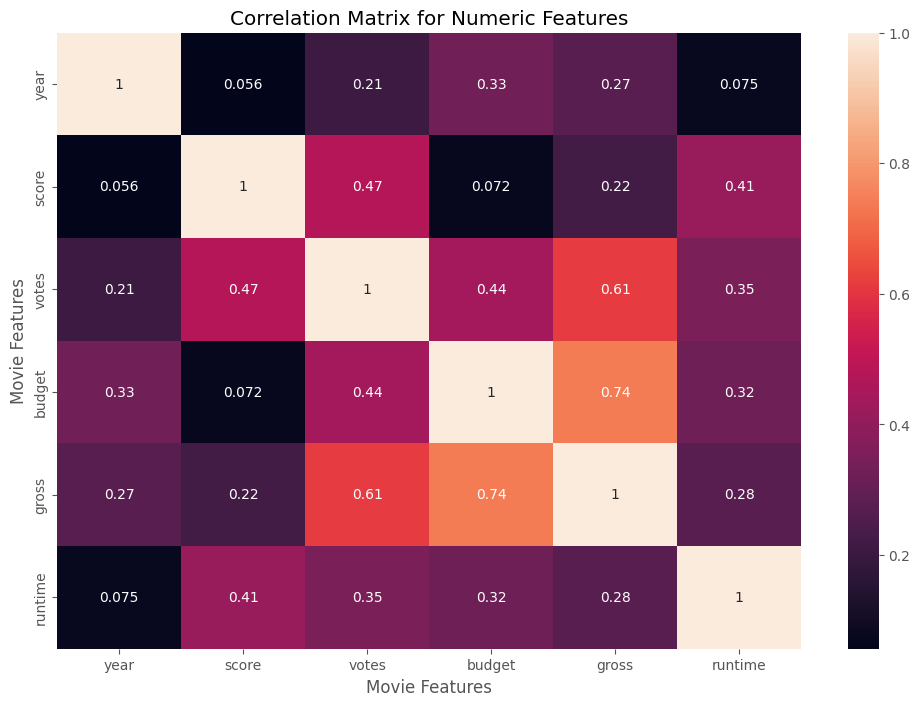

In [40]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True) #to show the above table in a visual format

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel ('Movie Features')

plt.ylabel ('Movie Features')

plt.show()

It can be noted that **budget and gross have the highest correaltion coefficient**, noting that it's important to keep in mind that Pearson's correlation coefficient measures only the strength and direction of the linear relationship. It does not capture nonlinear relationships or other types of associations between variables. Therefore, if the relationship between budget and gross earnings is expected to be nonlinear, other correlation measures such as Spearman's rank correlation coefficient or Kendall's tau may be more appropriate.

####4.5.2 Correlation of non-numeric features

In [41]:
#Conversion of non-numeric features to numeric format
df_converted=df

for col_name in df_converted.columns:
    if(df_converted[col_name].dtype == 'object'):
        df_converted[col_name]= df_converted[col_name].astype('category')
        df_converted[col_name] = df_converted[col_name].cat.codes

df_converted


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0


In [42]:
df_converted.corr() #the default correlation coefficient is Pearson

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


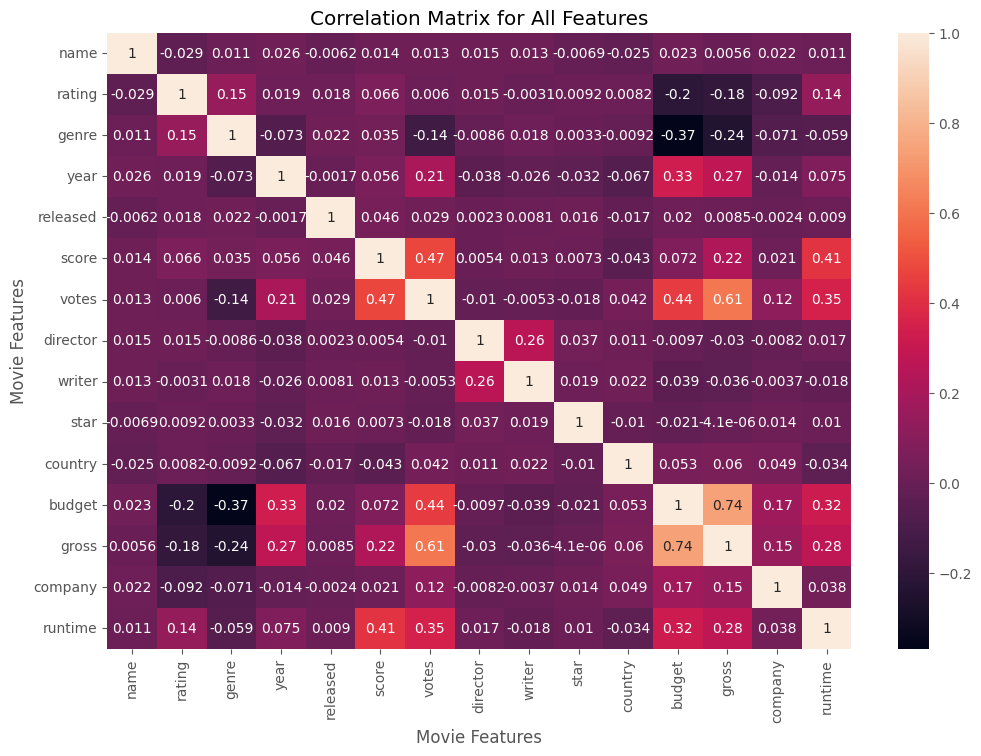

In [43]:
correlation_matrix = df_converted.corr()

sns.heatmap(correlation_matrix, annot=True) #to show the above table in a visual format

plt.title('Correlation Matrix for All Features')

plt.xlabel ('Movie Features')

plt.ylabel ('Movie Features')

plt.show()

In [48]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Compute the correlation matrix and display all correlations
correlation_matrix = df_converted.corr()
print(correlation_matrix.unstack())


name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [51]:
# Compute the correlation matrix and unstack it
correlation_matrix = df_converted.corr()
correlation_pairs = correlation_matrix.unstack()

# Sort the correlation pairs in descending order
sorted_pairs = correlation_pairs.sort_values(ascending=False)

print(sorted_pairs)

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
votes     score       0.474256
score     votes       0.474256
budget    votes       0.439675
votes     budget      0.439675
runtime   score       0.414068
score     runtime     0.414068
runtime   votes       0.352303
votes     runtime     0.352303
budget    year        0.327722
year      budget      0.327722
runtime   budget      0.318695
budget    runtime     0.318695
gross     runtime     0.275796
runtime 

In [52]:
high_corr=sorted_pairs [(sorted_pairs)>0.5]
high_corr

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
dtype: float64

Based on the above values, budget and votes have the highest correlation to gross earnings!